In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

In [2]:
data_path = "Training.csv"
data = pd.read_csv(data_path)
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [3]:
data.dropna(axis = 1,inplace=True)
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
disease_count = data['prognosis'].value_counts()
temp_df = pd.DataFrame({"Disease" : disease_count.index,
                          "Counts" : disease_count.values})

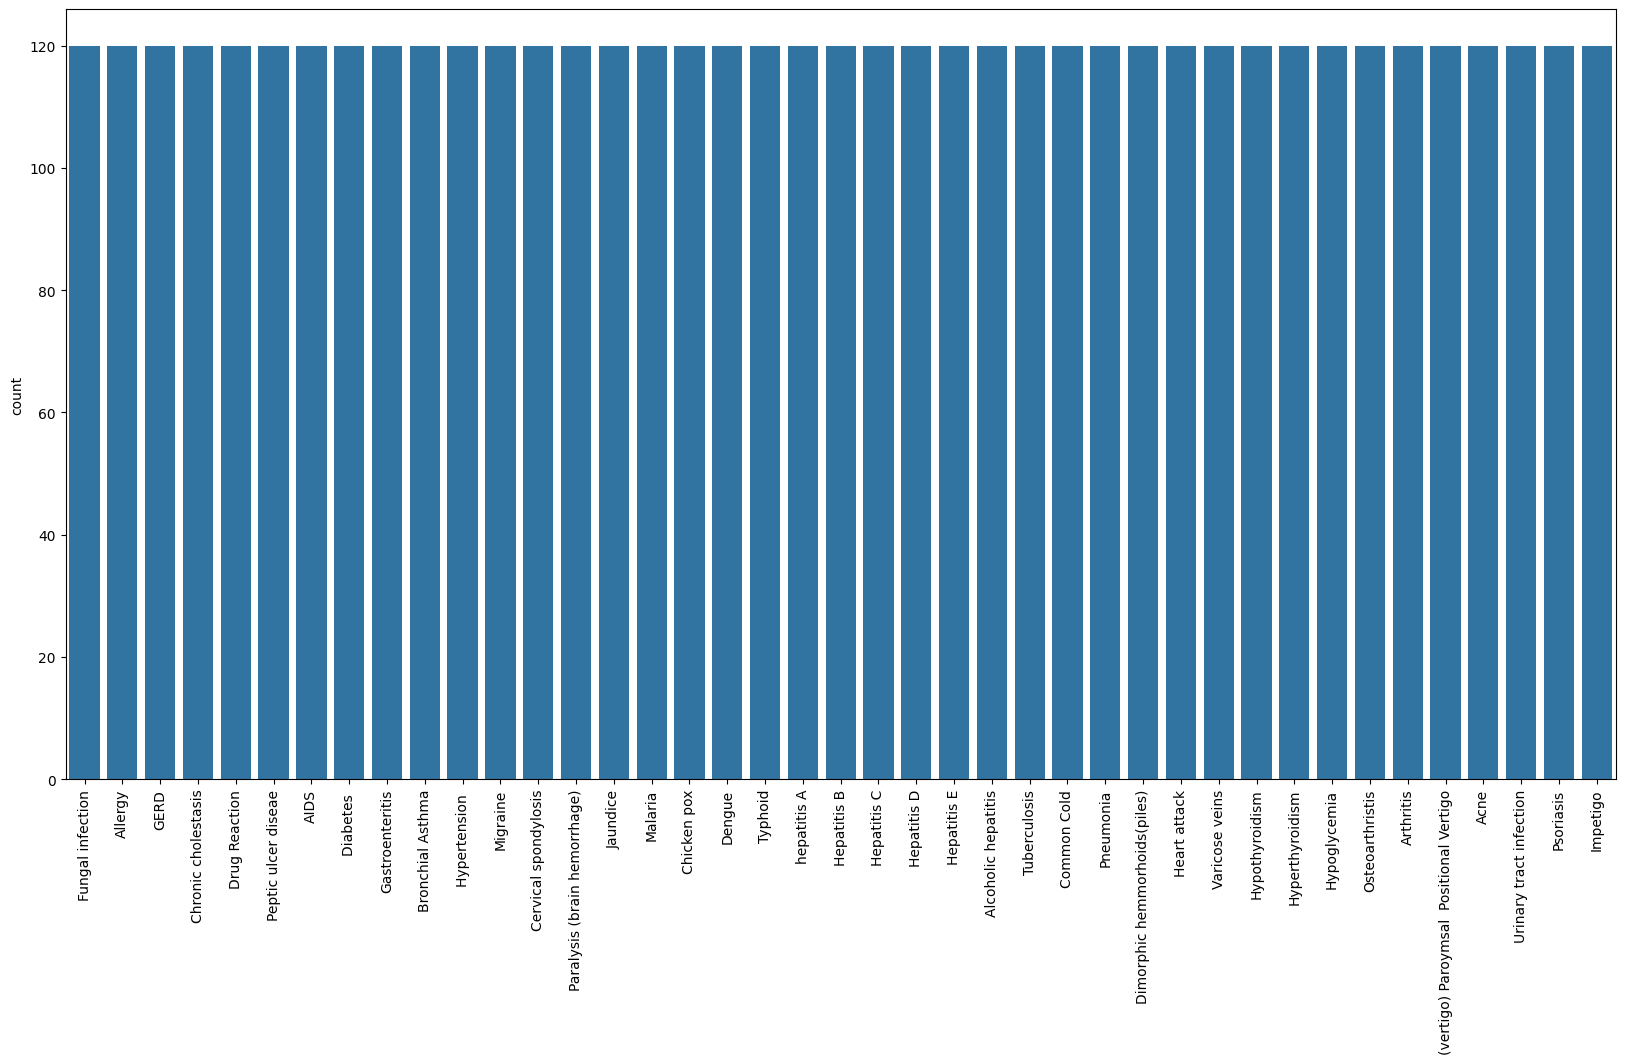

In [5]:
plt.figure(figsize=(20,10))
sns.barplot(x = data["prognosis"].unique(), y = disease_count)
plt.xticks(rotation = 90)
plt.show()

In [6]:
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

In [7]:
data["prognosis"]

0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: prognosis, Length: 4920, dtype: int32

In [8]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

In [9]:
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [10]:
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

models = {
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state= 18)
}

for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10,n_jobs = -1, scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVM
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Naive Bayes
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


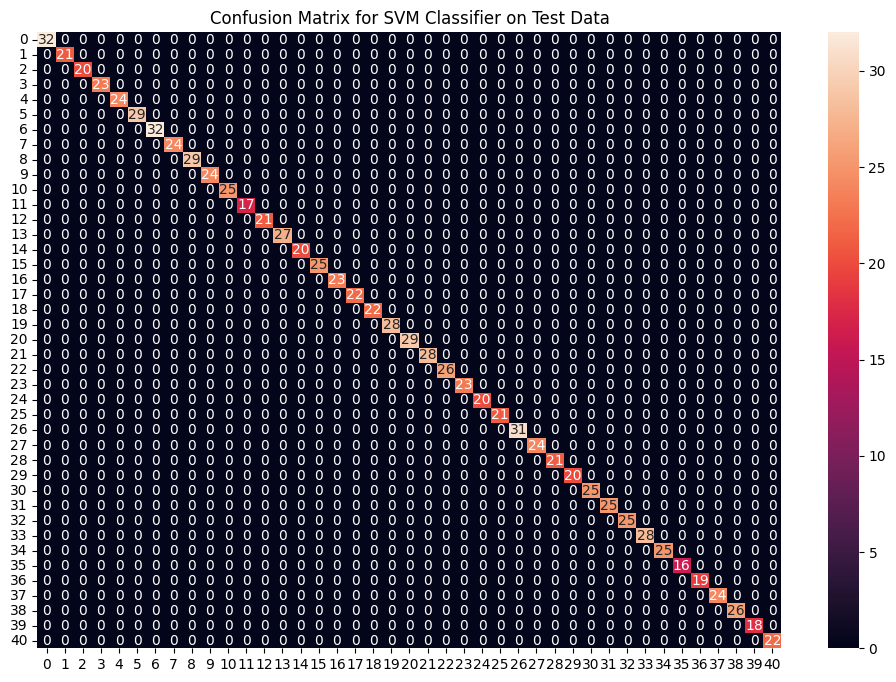

In [11]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


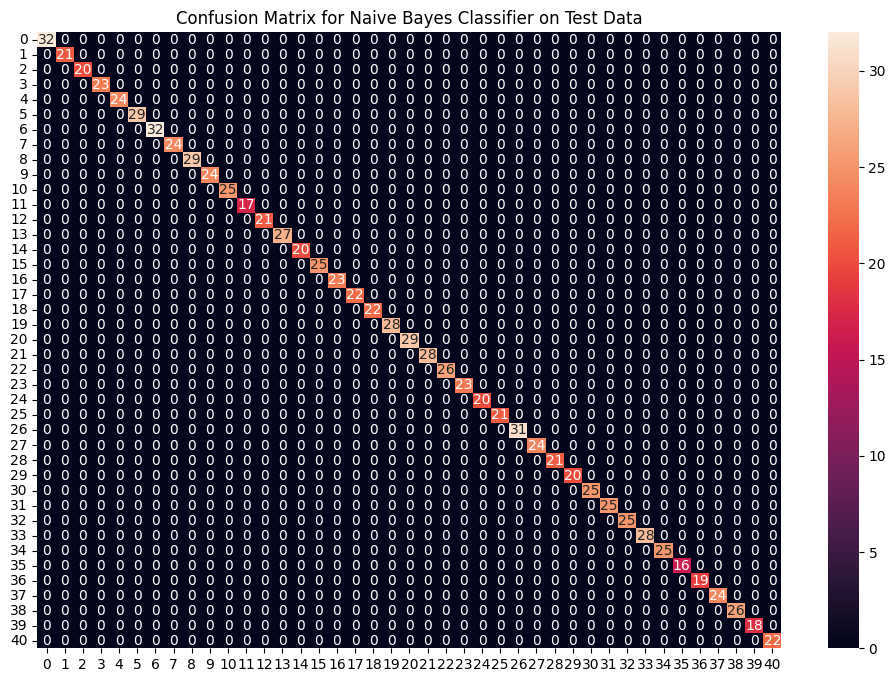

In [12]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()


Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


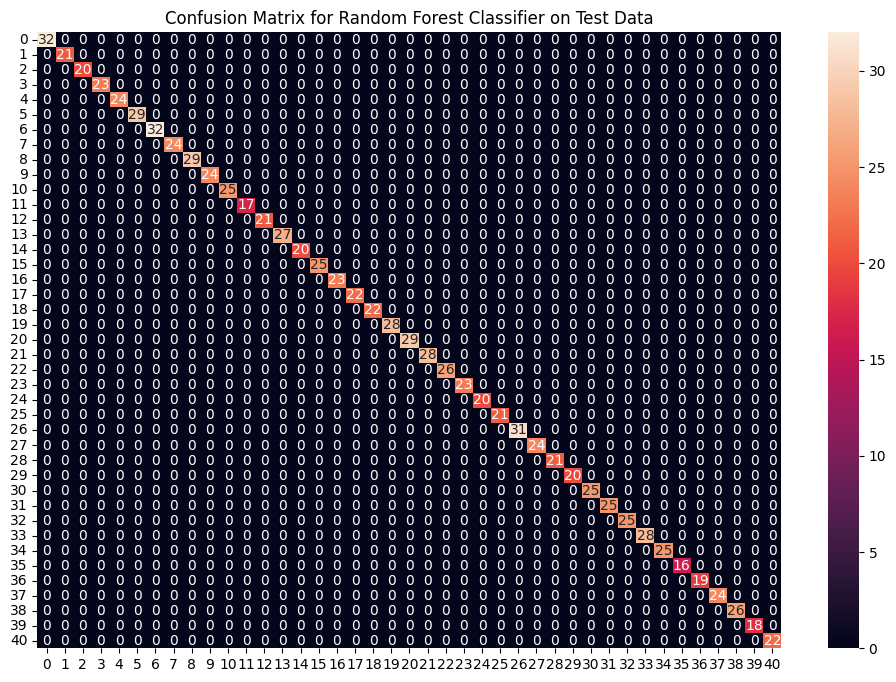

In [13]:
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

In [14]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

RandomForestClassifier(random_state=18)

In [15]:
test_data = pd.read_csv("Testing.csv").dropna(axis = 1)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

In [16]:
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

In [17]:
from scipy import stats
final_preds = [stats.mode([i,j,k])[0] for i,j,k in zip(svm_preds, nb_preds, rf_preds)]


Accuracy on Test dataset by the combined model: 100.0


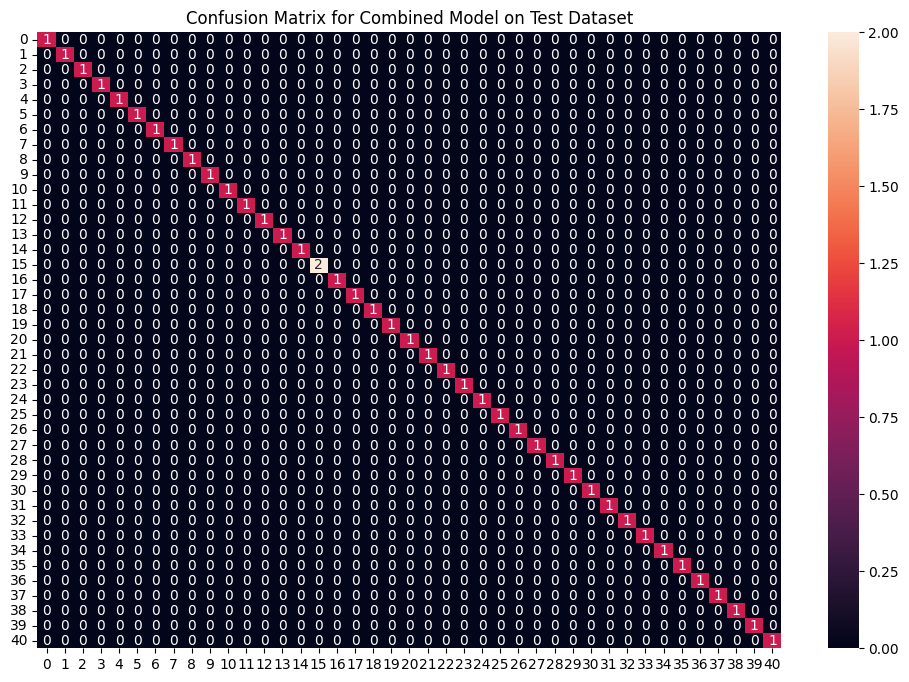

In [18]:
print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds)*100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

In [24]:
symptoms = X.columns.values
symptoms

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_ urination',
       'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
       'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
       'patches_in_throat', 'irregular_sugar_level', 'cough',
       'high_fever', 'sunken_eyes', 'breathlessness', 'sweating',
       'dehydration', 'indigestion', 'headache', 'yellowish_skin',
       'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
       'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea',
       'mild_fever', 'yellow_urine', 'yellowing_of_eyes',
       'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach',
       'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision',
       'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_press

In [25]:

symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

In [31]:
data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes": encoder.classes_
}

In [32]:
data_dict

{'symptom_index': {'Itching': 0,
  'Skin Rash': 1,
  'Nodal Skin Eruptions': 2,
  'Continuous Sneezing': 3,
  'Shivering': 4,
  'Chills': 5,
  'Joint Pain': 6,
  'Stomach Pain': 7,
  'Acidity': 8,
  'Ulcers On Tongue': 9,
  'Muscle Wasting': 10,
  'Vomiting': 11,
  'Burning Micturition': 12,
  'Spotting  urination': 13,
  'Fatigue': 14,
  'Weight Gain': 15,
  'Anxiety': 16,
  'Cold Hands And Feets': 17,
  'Mood Swings': 18,
  'Weight Loss': 19,
  'Restlessness': 20,
  'Lethargy': 21,
  'Patches In Throat': 22,
  'Irregular Sugar Level': 23,
  'Cough': 24,
  'High Fever': 25,
  'Sunken Eyes': 26,
  'Breathlessness': 27,
  'Sweating': 28,
  'Dehydration': 29,
  'Indigestion': 30,
  'Headache': 31,
  'Yellowish Skin': 32,
  'Dark Urine': 33,
  'Nausea': 34,
  'Loss Of Appetite': 35,
  'Pain Behind The Eyes': 36,
  'Back Pain': 37,
  'Constipation': 38,
  'Abdominal Pain': 39,
  'Diarrhoea': 40,
  'Mild Fever': 41,
  'Yellow Urine': 42,
  'Yellowing Of Eyes': 43,
  'Acute Liver Failure': 4

In [37]:
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    
    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
        
    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)
    
    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
    
    # making final prediction by taking mode of all predictions
    # Use statistics.mode instead of scipy.stats.mode
    import statistics
    final_prediction = statistics.mode([rf_prediction, nb_prediction, svm_prediction])
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction":final_prediction
    }
    return predictions

# Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))

# This code is modified by Susobhan Akhuli

{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


C:\Users\quang\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\quang\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\quang\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
